# Image Blending

In this assignment you should implement the blending of the two images. You can download images with the cell above.

In order to blend the images, you should follow the following steps:

1. Construct the Laplacian Pyramids for each image
2. Now we should blend two pyramids: construct the third pyramid where you take first half of the image from the left pyramid and second half of the image from the right pyramid.
3. Reconstruct the original image with the new merged pyramid

You should obtain the following result:

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read apple and orange in rgb format
apple = plt.imread('apple.jpg')
orange = plt.imread('orange.jpg')
print(apple.shape, orange.shape)

(512, 512, 3) (512, 512, 3)


In [3]:
def construct_gaussian_pyramid(img, num_levels):
    G = img.copy()
    gp = [G]
    for i in range(num_levels):
        G = cv.pyrDown(G)
        gp.append(G)
    return gp

def construct_laplacian_pyramid(gaussian_pyramid):
    lp = [gaussian_pyramid[-1]]
    for i in range(len(gaussian_pyramid)-1, 0, -1):
        GE = cv.pyrUp(gaussian_pyramid[i])
        L = cv.subtract(gaussian_pyramid[i-1], GE)
        lp.append(L)
    return lp


def merge_left_and_right(lpa, lpb):
    LS = []
    for la, lb in zip(lpa, lpb):
        _, cols, _ = la.shape
        ls = np.hstack((la[:, 0:cols//2], lb[:, cols//2:]))
        LS.append(ls)
    return LS

def reconstruct_image_from_laplacian_pyramid(laplacian_pyramid):
    reco = laplacian_pyramid[0]
    for i in range(1, len(laplacian_pyramid)):
        reco = cv.pyrUp(reco)
        reco = cv.add(reco, laplacian_pyramid[i])
    return reco

def construct_weighted_pyramid(l1, l2, alpha):
    weighted_pyram = []
    for l, r, al in zip(l1, l2, alpha):
        blended = l * al[:, :, np.newaxis] + r * ((1 - al)[:, :, np.newaxis])
        weighted_pyram.append(blended)
    return weighted_pyram


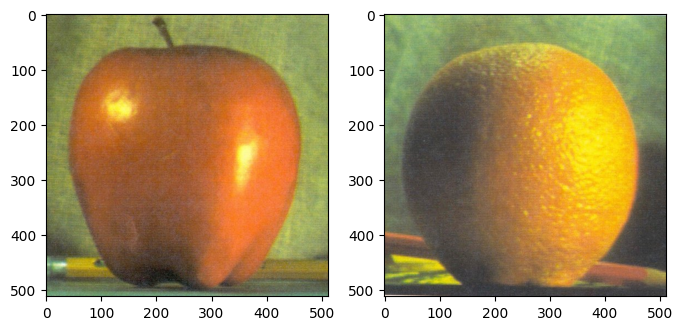

In [4]:
plt.figure(figsize=(8,10))
plt.subplot(1,2,1)
plt.imshow(apple)
plt.subplot(1,2,2)
plt.imshow(orange)
plt.show()

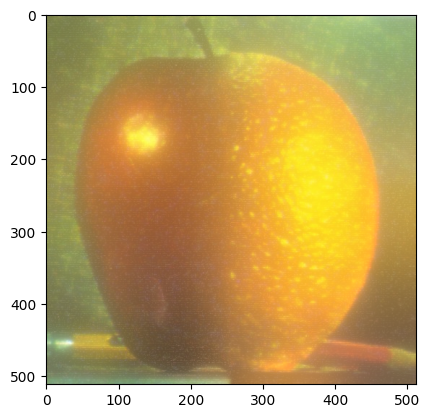

In [5]:
apple_g = construct_gaussian_pyramid(apple, 6)
orange_g = construct_gaussian_pyramid(orange, 6)

apple_l = construct_laplacian_pyramid(apple_g)
orange_l = construct_laplacian_pyramid(orange_g)

apple_orange_pyramid = merge_left_and_right(apple_l, orange_l)

apple_orange_reconstruct = reconstruct_image_from_laplacian_pyramid(apple_orange_pyramid)

plt.imshow(apple_orange_reconstruct)
plt.show()

# Image Blending with Mask

In general, we can have an arbirtary mask and blend two images according to this mask. The procedure is the following:

1. Construct laplacian pyramids for 2 images that you want to blend
2. Construct gaussian pyramid for a mask
3. Compute weighted sum for each level of the pyramid
$$
L = L_1 \alpha + L_2 (1 - \alpha)
$$

4. Reconstruct the image from the blended pyramid

You should obtain the following result.

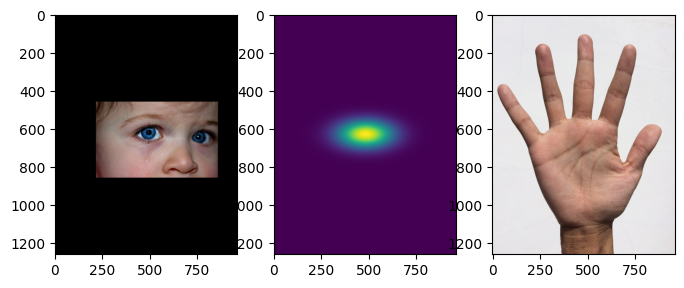

In [6]:
eye, mask, hand = plt.imread('eye.png'), plt.imread('mask.png'), plt.imread('hand.png')

plt.figure(figsize=(8,10))
plt.subplot(1,3,1)
plt.imshow(eye)
plt.subplot(1,3,2)
plt.imshow(mask)
plt.subplot(1,3,3)
plt.imshow(hand)
plt.show()


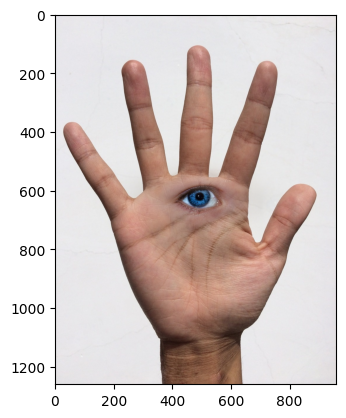

In [7]:
hand_l = construct_laplacian_pyramid(construct_gaussian_pyramid(hand, 2))
eye_l = construct_laplacian_pyramid(construct_gaussian_pyramid(eye, 2))
mask_g = construct_gaussian_pyramid(mask, 2)[::-1]

hand_eye_pyramid = construct_weighted_pyramid(eye_l, hand_l, mask_g)

hand_eye_reconstruct = reconstruct_image_from_laplacian_pyramid(hand_eye_pyramid)

plt.imshow(hand_eye_reconstruct)
plt.show()
